In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [18]:
import numpy as np  # <-- Add this at the top

# Load the preprocessed training and validation data
X_train = np.load('../gtsrb-preprocessed/X_train.npy')
X_val = np.load('../gtsrb-preprocessed/X_val.npy')
y_train = np.load('../gtsrb-preprocessed/y_train.npy')
y_val = np.load('../gtsrb-preprocessed/y_val.npy')

# Check shapes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (172, 48, 48, 3)
X_val shape: (43, 48, 48, 3)
y_train shape: (172,)
y_val shape: (43,)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # <-- Add this at the top

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    zoom_range=0.1
)

# Fit the generator to training data
datagen.fit(X_train)


In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the dataset
X_train = np.load('../gtsrb-preprocessed/X_train.npy')
y_train = np.load('../gtsrb-preprocessed/y_train.npy')

# Check shape of y_train
print("y_train shape:", y_train.shape)  # Debugging step

# Define the number of classes
num_classes = len(np.unique(y_train))  # Correct way to get unique class labels

# Convert y_train to one-hot encoding if needed
y_train = to_categorical(y_train, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(num_classes, activation='softmax')  # Use the correct num_classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print("Model is successfully compiled!")


y_train shape: (172,)
Model is successfully compiled!


In [21]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the dataset
X_train = np.load('../gtsrb-preprocessed/X_train.npy')
y_train = np.load('../gtsrb-preprocessed/y_train.npy')
X_val = np.load('../gtsrb-preprocessed/X_val.npy')
y_val = np.load('../gtsrb-preprocessed/y_val.npy')

# Debugging: Print shape of y_train before one-hot encoding
print("y_train shape before encoding:", y_train.shape)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Debugging: Print shape of y_train after one-hot encoding
print("y_train shape after encoding:", y_train.shape)  # Should be (samples, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(num_classes, activation='softmax')  # Correct number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    zoom_range=0.1
)
datagen.fit(X_train)

# Train the model
epochs = 20
batch_size = 32

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs,
    verbose=1
)


y_train shape before encoding: (172,)
y_train shape after encoding: (172, 43)
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.0077 - loss: 3.8767 - val_accuracy: 0.0233 - val_loss: 3.7466
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0158 - loss: 3.7780 - val_accuracy: 0.1163 - val_loss: 3.7321
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0467 - loss: 3.7411 - val_accuracy: 0.0465 - val_loss: 3.7008
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0619 - loss: 3.7195 - val_accuracy: 0.0698 - val_loss: 3.6383
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0978 - loss: 3.6388 - val_accuracy: 0.0698 - val_loss: 3.5161
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0689 - loss: 3.5731 - val_accuracy: 0.1163 - val_loss: 3.3617
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1335 - loss: 3.4149 - val_accuracy: 0.2558 - val_loss: 3.1653
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/ste

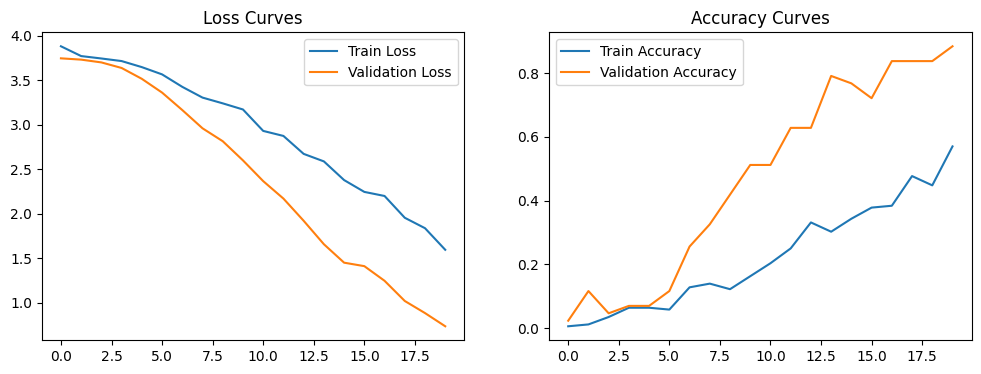

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8912 - loss: 0.7044
Validation Accuracy: 0.8837


In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Accuracy: {test_acc:.4f}")


In [24]:
model.save("model.keras")  # New recommended format

print("Model saved successfully!")


Model saved successfully!
